In [1]:
import numpy as np
import pandas as pd

Гулкевич Борис Ка-32МП, варіант 8
Алгоритм DBSCAN. Розрахувати додатковий результат кластеризацiї:
estimated number of noise points.
Метрики якостi: Estimated number of clusters, Homogeneity, Completeness,
V-measure.
Чи є розбиття стабiльним на пiдвибiрках даних?

Початковi данi:
(а) sklearn.datasets.make_moons
(б) from s k l e a r n . d a t a s e t s . sample s_gene ra to r import make_blobs
X1, y_true = make_blobs ( n_samples =10000 , c e n t e r s =4,

cl u s t e r _ s t d =0.60 , random_state=0)

rng = np . random . RandomState (13 )
X = np . dot (X1, rng . randn ( 2 , 2 ) )

In [2]:
from sklearn.datasets import make_moons

In [3]:
from sklearn.cluster import DBSCAN

Для варіанту а)make moons

In [4]:
X, y = make_moons(noise=0.01, random_state=42)

In [5]:
from matplotlib import pyplot as plt

Візуалізація

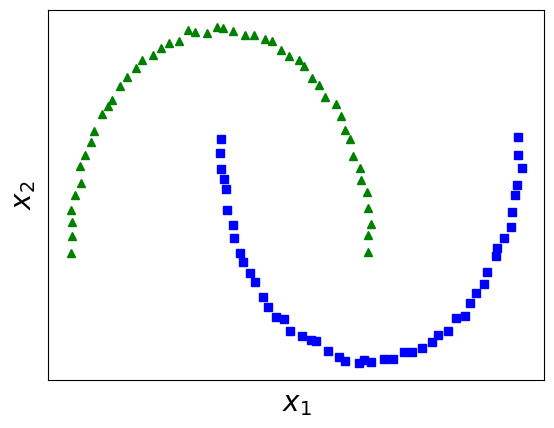

In [6]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Проведення кластеризації

In [9]:
clustering = DBSCAN()

In [10]:
y_pred = clustering.fit_predict(X)

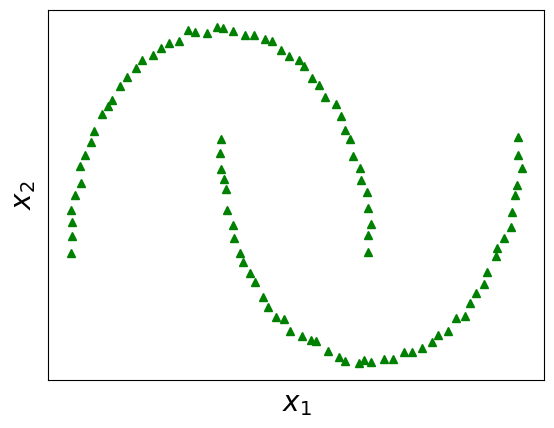

In [11]:
plt.plot(X[:, 0][y_pred==1], X[:, 1][y_pred==1], "bs")
plt.plot(X[:, 0][y_pred==0], X[:, 1][y_pred==0], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

У ході проведення експерименту було виявлено, що створюються лише один кластер якщо додавати хоч якийсь параметр шуму

Розгляд часу роботи на просто взятому

In [12]:
from time import process_time

In [13]:
clustering = DBSCAN()
start = process_time()
y_pred = clustering.fit_predict(X)
end = process_time()
end-start

0.015625

Збільшимо кількість до дуже великого

In [17]:
X_big, y_big = make_moons(n_samples=100000)

In [18]:
clustering = DBSCAN()

In [19]:
start = process_time()
y_pred = clustering.fit_predict(X_big)
end = process_time()
end-start

40.453125

При збільшенні у півтора рази йде у нескінченний луп

Розглянемо з різними параметрами. Спершу подивимося на eps=0.4

In [38]:
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import homogeneity_score

In [39]:
clustering = DBSCAN(eps=0.4)
start = process_time()
y_pred = clustering.fit_predict(X)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
homog = homogeneity_score(y,y_pred)
completen = completeness_score(y,y_pred)

In [41]:
print("predicted clusters = ", n_clusters_)
print("homogeneity = ", homog)
print("completeness = ", completen)

predicted clusters =  2
homogeneity =  1.0
completeness =  1.0


Для демонстрації зміни від шуму і розміру епс покажу цю модель. Висновок виходить що при збільшенні епс то буде просто один клас

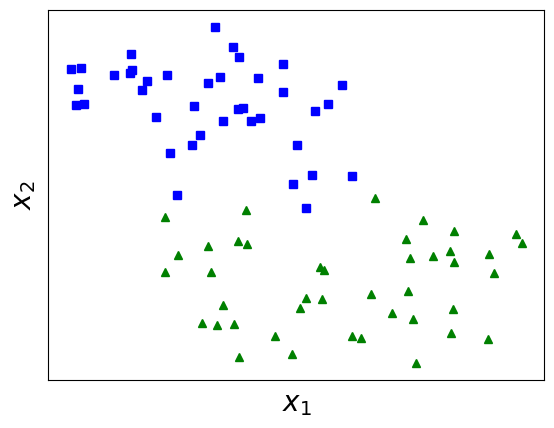

In [30]:
X1, y1 = make_moons(noise=0.2, random_state=42)
clustering = DBSCAN(eps=0.3)
start = process_time()
y_pred1 = clustering.fit_predict(X1)
plt.plot(X1[:, 0][y_pred1==1], X1[:, 1][y_pred1==1], "bs")
plt.plot(X1[:, 0][y_pred1==0], X1[:, 1][y_pred1==0], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

Розглянемо різні варіанти відстані. Спершу ‘nan_euclidean’

In [42]:
clustering = DBSCAN(eps=0.4, metric='nan_euclidean')
start = process_time()
y_pred = clustering.fit_predict(X)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
homog = homogeneity_score(y,y_pred)
completen = completeness_score(y,y_pred)
print("predicted clusters = ", n_clusters_)
print("homogeneity = ", homog)
print("completeness = ", completen)

predicted clusters =  2
homogeneity =  1.0
completeness =  1.0


Для l1

In [43]:
clustering = DBSCAN(eps=0.4, metric='l1')
start = process_time()
y_pred = clustering.fit_predict(X)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
homog = homogeneity_score(y,y_pred)
completen = completeness_score(y,y_pred)
print("predicted clusters = ", n_clusters_)
print("homogeneity = ", homog)
print("completeness = ", completen)

predicted clusters =  2
homogeneity =  1.0
completeness =  1.0


Зменшимо кількість мінімальних точок поряд біля точки щоб вважати її центром кластера

In [44]:
clustering = DBSCAN(eps=0.4, min_samples=1)
start = process_time()
y_pred = clustering.fit_predict(X)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
homog = homogeneity_score(y,y_pred)
completen = completeness_score(y,y_pred)
print("predicted clusters = ", n_clusters_)
print("homogeneity = ", homog)
print("completeness = ", completen)

predicted clusters =  2
homogeneity =  1.0
completeness =  1.0


Для 50

In [45]:
clustering = DBSCAN(eps=0.4, min_samples=50)
start = process_time()
y_pred = clustering.fit_predict(X)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
homog = homogeneity_score(y,y_pred)
completen = completeness_score(y,y_pred)
print("predicted clusters = ", n_clusters_)
print("homogeneity = ", homog)
print("completeness = ", completen)

predicted clusters =  0
homogeneity =  0.0
completeness =  1.0


Чи є розбиття стабiльним на пiдвибiрках даних?

In [53]:
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import KFold


clustering = DBSCAN(eps=0.4)
y_pred = clustering.fit_predict(X)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
stability_scores = []

for train_index, test_index in kf.split(X):
    
    dbscan = DBSCAN(eps=0.4, min_samples=5)
    
    test_clusters = dbscan.fit_predict(X)
    
    ari = adjusted_rand_score(y_pred[test_index], test_clusters)
    stability_scores.append(ari)

# Результати
mean_ari = np.mean(stability_scores)

print(f'Mean Adjusted Rand Index: {mean_ari}')

Mean Adjusted Rand Index: 1


Висновок по першому набору даних: модель показала себе ідеально на взятому наборі даних, але лише при правильному eps. Так, якщо eps не буде відповідати рівню шумів у цьому датасеті, то або дані всі будуть взяті в один кластер, або не буде жодного кластера.

Розглянемо для другого набору даних

In [55]:
from sklearn.datasets import make_blobs
X1, y_true = make_blobs (n_samples =10000, 
                         centers=4, 
                         cluster_std =0.60, 
                         random_state=0) 
rng = np.random.RandomState(13)
X = np.dot(X1,rng.randn(2,2))

[0 3 2 ... 2 1 2]


Візуалізація

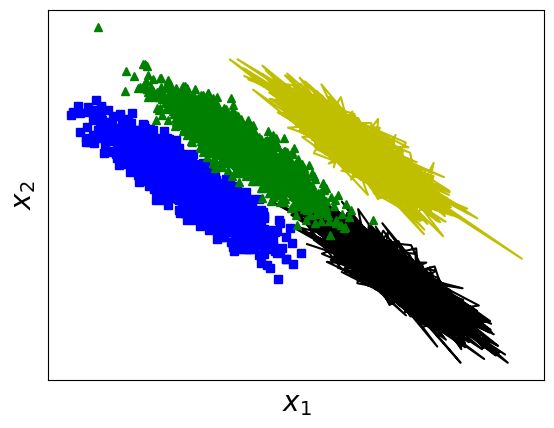

In [57]:
plt.plot(X[:, 0][y_true==3], X[:, 1][y_true==3], "y")
plt.plot(X[:, 0][y_true==2], X[:, 1][y_true==2], "k")
plt.plot(X[:, 0][y_true==1], X[:, 1][y_true==1], "bs")
plt.plot(X[:, 0][y_true==0], X[:, 1][y_true==0], "g^")

plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

Проведення кластеризації

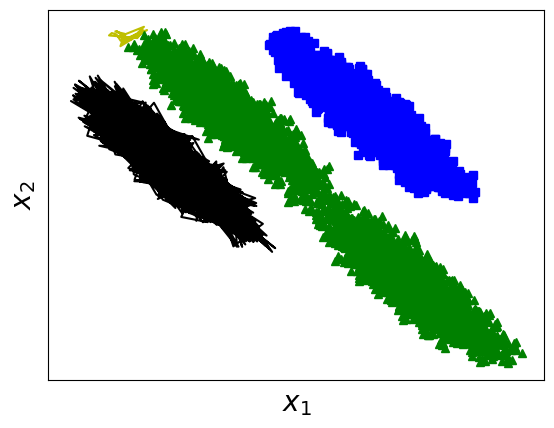

In [81]:
clustering = DBSCAN(eps=0.077)
y_pred = clustering.fit_predict(X)
labels = clustering.labels_
plt.plot(X[:, 0][y_pred==3], X[:, 1][y_pred==3], "y")
plt.plot(X[:, 0][y_pred==2], X[:, 1][y_pred==2], "k")
plt.plot(X[:, 0][y_pred==1], X[:, 1][y_pred==1], "bs")
plt.plot(X[:, 0][y_pred==0], X[:, 1][y_pred==0], "g^")

plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

In [82]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
homog = homogeneity_score(y_true,y_pred)
completen = completeness_score(y_true,y_pred)
print("predicted clusters = ", n_clusters_)
print("homogeneity = ", homog)
print("completeness = ", completen)

predicted clusters =  11
homogeneity =  0.7292989279574332
completeness =  0.8600218028627366


Бачимо ненайкращий розгляд

Подивимося на роботу на дуже великому зразку даних

In [120]:
X11, y_true1 = make_blobs (n_samples =100000, 
                         centers=4, 
                         cluster_std =0.60, 
                         random_state=0) 
rngg = np.random.RandomState(13)
X12 = np.dot(X11,rngg.randn(2,2))
clustering1 = DBSCAN(eps=0.077)
start = process_time()
y_pred1 = clustering1.fit_predict(X12)
end = process_time()
labels = clustering1.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
homog = homogeneity_score(y_true1,y_pred1)
completen = completeness_score(y_true1,y_pred1)
print("predicted clusters = ", n_clusters_)
print("homogeneity = ", homog)
print("completeness = ", completen)

predicted clusters =  5
homogeneity =  0.00039007947336063914
completeness =  0.03162203957724351


In [121]:
end-start

2.046875

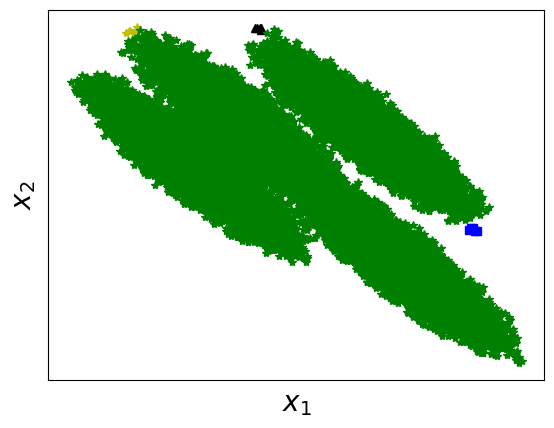

In [95]:
plt.plot(X12[:, 0][y_pred1==3], X12[:, 1][y_pred1==3], "y*")
plt.plot(X12[:, 0][y_pred1==2], X12[:, 1][y_pred1==2], "k^")
plt.plot(X12[:, 0][y_pred1==1], X12[:, 1][y_pred1==1], "bs")
plt.plot(X12[:, 0][y_pred1==0], X12[:, 1][y_pred1==0], "g*")

plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

Розглянемо при різних параметрах eps: 0.5, 0.1, 0.05, 0.03, 0.01, eps=0.089

In [97]:
clustering = DBSCAN(eps=0.5)
y_pred = clustering.fit_predict(X)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
homog = homogeneity_score(y_true,y_pred)
completen = completeness_score(y_true,y_pred)
print("predicted clusters = ", n_clusters_)
print("homogeneity = ", homog)
print("completeness = ", completen)

predicted clusters =  1
homogeneity =  0.0001000144298374093
completeness =  0.07284232560440568


In [98]:
clustering = DBSCAN(eps=0.05)
y_pred = clustering.fit_predict(X)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
homog = homogeneity_score(y_true,y_pred)
completen = completeness_score(y_true,y_pred)
print("predicted clusters = ", n_clusters_)
print("homogeneity = ", homog)
print("completeness = ", completen)

predicted clusters =  44
homogeneity =  0.9054018824622158
completeness =  0.7115940878656039


In [110]:
clustering = DBSCAN(eps=0.1)
y_pred = clustering.fit_predict(X)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
homog = homogeneity_score(y_true,y_pred)
completen = completeness_score(y_true,y_pred)
print("predicted clusters = ", n_clusters_)
print("homogeneity = ", homog)
print("completeness = ", completen)


predicted clusters =  4
homogeneity =  0.40029920022063414
completeness =  0.8817643483248188


In [100]:
clustering = DBSCAN(eps=0.03)
y_pred = clustering.fit_predict(X)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
homog = homogeneity_score(y_true,y_pred)
completen = completeness_score(y_true,y_pred)
print("predicted clusters = ", n_clusters_)
print("homogeneity = ", homog)
print("completeness = ", completen)

predicted clusters =  172
homogeneity =  0.7547418193186002
completeness =  0.40581195873954123


In [101]:
clustering = DBSCAN(eps=0.01)
y_pred = clustering.fit_predict(X)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
homog = homogeneity_score(y_true,y_pred)
completen = completeness_score(y_true,y_pred)
print("predicted clusters = ", n_clusters_)
print("homogeneity = ", homog)
print("completeness = ", completen)

predicted clusters =  48
homogeneity =  0.027212244031065
completeness =  0.16420911128713875


Для eps=0.1 розглянемо різні довжини

In [111]:
clustering = DBSCAN(eps=0.1, metric='nan_euclidean')
y_pred = clustering.fit_predict(X)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
homog = homogeneity_score(y_true,y_pred)
completen = completeness_score(y_true,y_pred)
print("predicted clusters = ", n_clusters_)
print("homogeneity = ", homog)
print("completeness = ", completen)

predicted clusters =  4
homogeneity =  0.40029920022063414
completeness =  0.8817643483248188


In [118]:
clustering = DBSCAN(eps=0.1, metric='l1')
y_pred = clustering.fit_predict(X)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
homog = homogeneity_score(y_true,y_pred)
completen = completeness_score(y_true,y_pred)
print("predicted clusters = ", n_clusters_)
print("homogeneity = ", homog)
print("completeness = ", completen)

predicted clusters =  8
homogeneity =  0.7305639368563626
completeness =  0.8754953477372364


In [119]:
clustering = DBSCAN(eps=0.1, metric='l2')
y_pred = clustering.fit_predict(X)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
homog = homogeneity_score(y_true,y_pred)
completen = completeness_score(y_true,y_pred)
print("predicted clusters = ", n_clusters_)
print("homogeneity = ", homog)
print("completeness = ", completen)

predicted clusters =  4
homogeneity =  0.40029920022063414
completeness =  0.8817643483248188


Найращий варіант отримано навколо eps=0.1 та метрик евклідової та l2

Висновок: виконавши роботу я оцінив роботу алгоритму DBSCAN при кластеризації двох датасетів. Він показав себе нормально на першому датасеті та гірше на другому. Вважаю, що результати першого вийгли такими через слабко задані параметри утворення датасету, хоча при правильному підборі епс всеодно ідеально знаходило. Параметри інші в більшості не впливали на результати для першого датасету. На ньому ж алгоритм починає зависати при роботі з даними розміром 140+ тисячами. Для другого датасету було отроимано в певній мірі "реалістичніші по відчуттях результати". Також на цьому датасеті алгоритм працював відчутно швидше і "надійніше". Для нього найкращим варіантом стало епсілон 0.1 та відстані через евклідової та l2. За виконаною роботою можна побачити, що на підвибірках зберігається розбиття, хоча і дещо менш ясно